In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.linalg import expm

use_latex = True # Set to True to use LaTeX for text rendering
save_figs = True  # Save figures

In [2]:
if use_latex:
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": 'Computer Modern Roman'
    })
    
if save_figs:
    figures_directory = '../figs'
    if not os.path.exists(figures_directory):
        os.makedirs(figures_directory)
        print(f"The directory '{figures_directory}' was created.")
    figures_subdirectory = '../figs/diff_F'
    if not os.path.exists(figures_subdirectory):
        os.makedirs(figures_subdirectory)
        print(f"The subdirectory '{figures_subdirectory}' was created.")

The subdirectory '../figs/diff_F' was created.


In [3]:
# Mine
data_x_true = pd.read_csv('../data/data_x_true.csv')
data_F = pd.read_csv('../data/data_F.csv')

# GMAT
data_gmat_x_true = pd.read_csv('/Users/joaogaspar/cernbox/WINDOWS/Desktop/data_gmat/data_gmat_x_true.csv')
data_gmat_STM = pd.read_csv('/Users/joaogaspar/cernbox/WINDOWS/Desktop/data_gmat/data_gmat_STM.csv')

# Time 
t = data_gmat_x_true['Chief1.A1ModJulian']
t = (t - t.iloc[0]) * 24 * 60 / 60

In [4]:
def convert_to_matrix(cell):
    values = list(map(float, cell.split()))
    matrix = np.array(values).reshape(6, 6)
    return matrix
data_F = data_F.map(convert_to_matrix, na_action=None)
data_F.head()

,F_chief,F_deputy1,F_deputy2,F_deputy3
0,"[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0...."
1,"[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0...."
2,"[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0...."
3,"[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0...."
4,"[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0...."


In [5]:
data_gmat_STM = pd.read_csv('/Users/joaogaspar/cernbox/WINDOWS/Desktop/data_gmat/data_gmat_STM.csv')

# Function to split and convert string to list of floats
def safe_split(cell):
    return [float(i) for i in cell.split()]

# Applying the safe_split function directly
data_gmat_STM['Chief1.OrbitSTM'] = data_gmat_STM['Chief1.OrbitSTM'].apply(safe_split)
data_gmat_STM['Deputy1.OrbitSTM'] = data_gmat_STM['Deputy1.OrbitSTM'].apply(safe_split)
data_gmat_STM['Deputy2.OrbitSTM'] = data_gmat_STM['Deputy2.OrbitSTM'].apply(safe_split)
data_gmat_STM['Deputy3.OrbitSTM'] = data_gmat_STM['Deputy3.OrbitSTM'].apply(safe_split)

# Convert the list of floats to a numpy array and reshape to 6x6 matrix
def to_matrix(data, col_name):
    matrices = []
    for i in range(0, len(data), 6):
        concatenated = sum(data[col_name][i:i+6], [])
        matrix = np.array(concatenated).reshape(6, 6)
        matrices.append(matrix)
    return matrices

# Applying the conversion function for each set of columns
data_gmat_STM = pd.DataFrame({
    'Chief1.OrbitSTM': to_matrix(data_gmat_STM, 'Chief1.OrbitSTM'),
    'Deputy1.OrbitSTM': to_matrix(data_gmat_STM, 'Deputy1.OrbitSTM'),
    'Deputy2.OrbitSTM': to_matrix(data_gmat_STM, 'Deputy2.OrbitSTM'),
    'Deputy3.OrbitSTM': to_matrix(data_gmat_STM, 'Deputy3.OrbitSTM')
})
data_gmat_STM.head()

,Chief1.OrbitSTM,Deputy1.OrbitSTM,Deputy2.OrbitSTM,Deputy3.OrbitSTM
0,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0....","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0....","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0....","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0...."
1,"[[0.9981689329012052, 0.0001716231419414366, -...","[[0.9978890051345688, -0.0001351287560169902, ...","[[1.000334375311087, -0.0009485942128774716, 0...","[[0.9985127556250024, 0.001088854349169775, 0...."
2,"[[0.9929314119080451, 0.0007531680781219039, -...","[[0.9915592648863238, -0.0004667581686758367, ...","[[1.001769235064174, -0.004036673862584309, 0....","[[0.9939972251817212, 0.004171871470868184, 0...."
3,"[[0.9847560458174045, 0.001842303143107494, -0...","[[0.9810306072844955, -0.0008845816010924235, ...","[[1.004976798234181, -0.00964088200007571, 0.0...","[[0.9863852720949984, 0.008980794133561423, 0...."
4,"[[0.9742201060536586, 0.003533976473063689, -0...","[[0.9663427650560092, -0.001278401521463918, 0...","[[1.01065608065559, -0.01815097168090456, 0.04...","[[0.9756257618908766, 0.01525904083685782, 0.0..."


In [6]:
# Playground
idx = 1
dt = 60
time = idx * dt
t_0 = 0

STM = expm(data_F['F_chief'][idx] * (time - t_0))
gmat_STM = data_gmat_STM['Chief1.OrbitSTM'][idx]
chief_gmat_state_vector = data_gmat_x_true[['Chief1.EarthMJ2000Eq.X', 'Chief1.EarthMJ2000Eq.Y', 'Chief1.EarthMJ2000Eq.Z', 'Chief1.EarthMJ2000Eq.VX', 'Chief1.EarthMJ2000Eq.VY', 'Chief1.EarthMJ2000Eq.VZ']].to_numpy()

print(gmat_STM @ chief_gmat_state_vector[0], np.sqrt(np.sum((gmat_STM @ chief_gmat_state_vector[0])**2, axis=0)))
print(chief_gmat_state_vector[idx], np.sqrt(np.sum(chief_gmat_state_vector[idx]**2, axis=0)))
print(np.sqrt(np.sum((gmat_STM @ chief_gmat_state_vector[0] - chief_gmat_state_vector[idx])**2, axis=0)))

[-1.74721825e+03 -9.21834503e+02  6.73845463e+03 -7.63850625e+00
  6.12906675e-02 -4.42849586e-01] 7022.063780743208
[-1.73814202e+03 -9.16018293e+02  6.69574552e+03 -7.32023833e+00
  2.54841449e-01 -1.86411273e+00] 6978.0579220684
44.07303916183186


In [7]:
chief_gmat_state_vector = data_gmat_x_true[['Chief1.EarthMJ2000Eq.X', 'Chief1.EarthMJ2000Eq.Y', 'Chief1.EarthMJ2000Eq.Z', 'Chief1.EarthMJ2000Eq.VX', 'Chief1.EarthMJ2000Eq.VY', 'Chief1.EarthMJ2000Eq.VZ']].to_numpy()
deputy1_gmat_state_vector = data_gmat_x_true[['Deputy1.EarthMJ2000Eq.X', 'Deputy1.EarthMJ2000Eq.Y', 'Deputy1.EarthMJ2000Eq.Z', 'Deputy1.EarthMJ2000Eq.VX', 'Deputy1.EarthMJ2000Eq.VY', 'Deputy1.EarthMJ2000Eq.VZ']].to_numpy()
deputy2_gmat_state_vector = data_gmat_x_true[['Deputy2.EarthMJ2000Eq.X', 'Deputy2.EarthMJ2000Eq.Y', 'Deputy2.EarthMJ2000Eq.Z', 'Deputy2.EarthMJ2000Eq.VX', 'Deputy2.EarthMJ2000Eq.VY', 'Deputy2.EarthMJ2000Eq.VZ']].to_numpy()
deputy3_gmat_state_vector = data_gmat_x_true[['Deputy3.EarthMJ2000Eq.X', 'Deputy3.EarthMJ2000Eq.Y', 'Deputy3.EarthMJ2000Eq.Z', 'Deputy3.EarthMJ2000Eq.VX', 'Deputy3.EarthMJ2000Eq.VY', 'Deputy3.EarthMJ2000Eq.VZ']].to_numpy()

dev_STM_chief, dev_STM_deputy1, dev_STM_deputy2, dev_STM_deputy3 = [], [], [], []
for idx in range(0, len(data_gmat_STM)):
    dev_STM_chief.append(np.sqrt(np.sum((chief_gmat_state_vector[idx] - data_gmat_STM['Chief1.OrbitSTM'][idx] @ chief_gmat_state_vector[0])**2, axis=0)))
    dev_STM_deputy1.append(np.sqrt(np.sum((deputy1_gmat_state_vector[idx] - data_gmat_STM['Deputy1.OrbitSTM'][idx] @ deputy1_gmat_state_vector[0])**2, axis=0)))
    dev_STM_deputy2.append(np.sqrt(np.sum((deputy2_gmat_state_vector[idx] - data_gmat_STM['Deputy2.OrbitSTM'][idx] @ deputy2_gmat_state_vector[0])**2, axis=0)))
    dev_STM_deputy3.append(np.sqrt(np.sum((deputy3_gmat_state_vector[idx] - data_gmat_STM['Deputy3.OrbitSTM'][idx] @ deputy3_gmat_state_vector[0])**2, axis=0)))

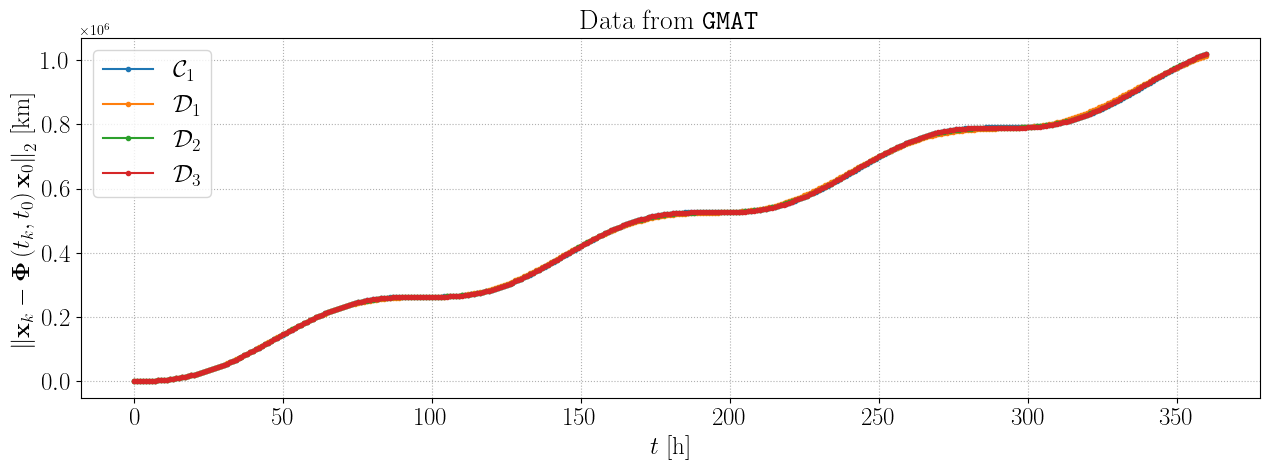

In [8]:
# Create figure and axes with specified size and grid layout
fig, axs = plt.subplots(1, 1, figsize=(6.4 * 2, 4.8 * 1))

# Apply fontsize to ticks
axs.tick_params(axis='both', which='major', labelsize=18)  # major ticks
axs.tick_params(axis='both', which='minor', labelsize=18)  # minor ticks

# Plot absolute errors
axs.plot(dev_STM_chief, '.-', label='$\mathcal{C}_1$')
axs.plot(dev_STM_deputy1, '.-', label='$\mathcal{D}_1$')
axs.plot(dev_STM_deputy2, '.-', label='$\mathcal{D}_2$')
axs.plot(dev_STM_deputy3, '.-', label='$\mathcal{D}_3$')
axs.set_xlabel("$t$ [h]", fontsize=18)
axs.set_ylabel("$\left\|\mathbf{x}_k - \mathbf{\Phi}\left(t_k, t_0\\right)\mathbf{x}_0\\right\|_2$ [km]", fontsize=18)
axs.grid(linestyle=':')
axs.legend(fontsize=18)
axs.set_title("Data from \\texttt{GMAT}", fontsize=20)

plt.tight_layout()  # Adjust layout to fit labels
if save_figs:
    plt.savefig('../figs/diff_F/stm_test_gmat.png', dpi=300)
plt.show()